# Documentation/Problem

Overview Document:
https://docs.google.com/document/d/1iCxfrZk6sItTWWmypH4ljDYWtyF3GRQ7Z1ejDXuf6Jo/edit?tab=t.0

Research Questions:

- Are sleeping habits related to suicidal thoughts?
- What's most highly correlated with suicidal thoughts?
- Does financial stress correlate with depression?
- Good binary values: Depression, suicidal thoughts.

Problem Statement: Our task is to find what factors contribute most to depression in students, like: sleeping habits, suicidal thoughts, stress, etc.

## Setup

All the imports for dataset analysis, preprocessing, and model building.

In [ ]:
# Normal imports
import sys
import pandas as pd
import numpy as np
# Preprocessing imports.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# Model training imports.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
# Sampling
from imblearn.over_sampling import SMOTE

Mounts to drive. Used so we can synchronize Google Drive directory data and not have to reimport the CSVs again.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Felipe's fancy way of registering the working directory into the collab notebook.

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Course\ 2/Final\ Project/* /content/

Finally, read the desired CSV file.

In [ ]:
data = pd.read_csv("Processed.csv")

# Data Preprocessing

## Doing our data cleaning:
1. Either turn columns 'Depression label' or 'Depression value' into a binary value (potentially turning it multi-class later on).
2. Drop the other Depression column, depending on what we use.
3. Drop columns unrelated to the Depression column.
4. Turn Num 7 into a numerical value.
5. Check for any numbers out of range, and null values.
6. Turn other categorical columns into numerical.

Ordinal Encoding:
- Order the column values and encode them from string into numerical. Encoding for obvious order.

One Hot Encoding:
- Encoding for those with no obvious order.

## Data Mapping

Below are some code blocks to help us map out information in our dataset. First thing to note, we are going to have to drop a variety of columns from the stress and anxiety table. We will use only their Value/Label as features if need-be.

Then for clarity, we will turn PHP (the questions for Depression) into their original question statements.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2028 non-null   object
 1   Gender                 2028 non-null   object
 2   University             2028 non-null   object
 3   Department             2028 non-null   object
 4   Academic_Year          2028 non-null   object
 5   Current_CGPA           2028 non-null   object
 6   waiver_or_scholarship  2028 non-null   object
 7   PSS1                   2028 non-null   int64 
 8   PSS2                   2028 non-null   int64 
 9   PSS3                   2028 non-null   int64 
 10  PSS4                   2028 non-null   int64 
 11  PSS5                   2028 non-null   int64 
 12  PSS6                   2028 non-null   int64 
 13  PSS7                   2028 non-null   int64 
 14  PSS8                   2028 non-null   int64 
 15  PSS9                 

Takes a look at the head in order to get a general idea of the dataset.

In [ ]:
data.head()

,Age,Gender,University,Department,Academic_Year,Current_CGPA,waiver_or_scholarship,PSS1,PSS2,PSS3,...,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,...,2,3,2,2,2,2,3,2,20,Severe Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,...,2,2,2,2,2,2,2,2,19,Moderately Severe Depression
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,...,0,0,0,0,0,0,0,0,0,No Depression
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,...,1,2,1,2,1,2,2,1,14,Moderate Depression
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,...,3,3,3,1,3,0,3,3,20,Severe Depression


### Dropping Anxiety and Stress columns.

Drop these for the reasons stated above.

In [ ]:
columns_to_drop = ['PSS1', 'PSS2', 'PSS3', 'PSS4','PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10','GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'Anxiety Value', 'Stress Value', 'Depression Value']
data = data.drop(columns=columns_to_drop)

We ended up dropping the value columns for Stress and Anxiety, instead opting to use their labels for their features.

**Important note**: We dropped Depression value as well because we opted to turn Depression Label into our target column.

In [ ]:
phq_columns_to_drop = ['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9']
data = data.drop(columns=phq_columns_to_drop)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2028 non-null   object
 1   Gender                 2028 non-null   object
 2   University             2028 non-null   object
 3   Department             2028 non-null   object
 4   Academic_Year          2028 non-null   object
 5   Current_CGPA           2028 non-null   object
 6   waiver_or_scholarship  2028 non-null   object
 7   Stress Label           2028 non-null   object
 8   Anxiety Label          2028 non-null   object
 9   Depression Label       2028 non-null   object
dtypes: object(10)
memory usage: 158.6+ KB


### Renaming PHQ to Questions.

Now we rename the PHQ questions for the reasons stated above.

In [ ]:
"""data = data.rename(columns={'PHQ1':'In a semester, how often have you had little interest or pleasure in doing things?',
                        'PHQ2':'In a semester, how often have you been feeling down, depressed or hopeless?',
                        'PHQ3':'In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?',
                        'PHQ4':'In a semester, how often have you been feeling tired or having little energy?',
                        'PHQ5':'In a semester, how often have you had poor appetite or overeating?',
                        'PHQ6':'In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?',
                        'PHQ7':'In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?',
                        'PHQ8':"In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?",
                        'PHQ9':'In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?'})"""

'data = data.rename(columns={\'PHQ1\':\'In a semester, how often have you had little interest or pleasure in doing things?\',\n                        \'PHQ2\':\'In a semester, how often have you been feeling down, depressed or hopeless?\',\n                        \'PHQ3\':\'In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?\',\n                        \'PHQ4\':\'In a semester, how often have you been feeling tired or having little energy?\',\n                        \'PHQ5\':\'In a semester, how often have you had poor appetite or overeating?\',\n                        \'PHQ6\':\'In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?\',\n                        \'PHQ7\':\'In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?\',\n                        \'PHQ8\':"In a semester, how often

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2028 non-null   object
 1   Gender                 2028 non-null   object
 2   University             2028 non-null   object
 3   Department             2028 non-null   object
 4   Academic_Year          2028 non-null   object
 5   Current_CGPA           2028 non-null   object
 6   waiver_or_scholarship  2028 non-null   object
 7   Stress Label           2028 non-null   object
 8   Anxiety Label          2028 non-null   object
 9   Depression Label       2028 non-null   object
dtypes: object(10)
memory usage: 158.6+ KB


### Continued Data Mapping + Getting Categorical Columns

Not too many rows dropped from duplicates. Should be good to do an implace.

In [ ]:
print(f"Number of Rows after dropping duplicates: {len(data.drop_duplicates())}")
print(f"How many rows dropped: {len(data) - len(data.drop_duplicates())}")

Number of Rows after dropping duplicates: 1692
How many rows dropped: 336


No rows were dropped. Might need to check into that in-case zeros were counted as null values. But first, we need to do some data encoding.

In [ ]:
print(f"Number of Rows after dropping null values: {len(data.dropna())}")
print(f"How many rows dropped: {len(data) - len(data.dropna())}")

Number of Rows after dropping null values: 2028
How many rows dropped: 0


First of all, we need to get a list of all available categorical columns.

In [ ]:
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns.columns.to_list()

['Age',
 'Gender',
 'University',
 'Department',
 'Academic_Year',
 'Current_CGPA',
 'waiver_or_scholarship',
 'Stress Label',
 'Anxiety Label',
 'Depression Label']

Decent amount of categorical columns. But they all aren't going to be encoded the same way.

## Data Encoding

### Categorical Converison

In order to work with the data with an object type (String) for a model, we have to convert them into a numeric type.

Now we need to decide what encoding to do with each column.

Print out all the current unique values in each categorical column currently.

In [ ]:
for col in categorical_columns:
    print(col, data[col].unique())

Age ['18-22' '23-26' '27-30' 'Above 30' 'Below 18']
Gender ['Female' 'Male' 'Prefer not to say']
University ['Independent University, Bangladesh (IUB)'
 'American International University Bangladesh (AIUB)'
 'North South University (NSU)' 'Islamic University of Technology (IUT)'
 'Patuakhali Science and Technology University'
 'Rajshahi University of Engineering and Technology (RUET)'
 'Dhaka University (DU)'
 'Bangladesh University of Engineering and Technology (BUET)'
 'Dhaka University of Engineering and Technology (DUET)'
 'United International University (UIU)' 'East West University (EWU)'
 'BRAC University' 'Bangladesh Agricultural University (BAU)'
 'Rajshahi University (RU)' 'Daffodil University']
Department ['Engineering - CS / CSE / CSC / Similar to CS'
 'Engineering - EEE/ ECE / Similar to EEE' 'Other'
 'Business and Entrepreneurship Studies' 'Environmental and Life Sciences'
 'Engineering - Mechanical Engineering / Similar to ME'
 'Engineering - Civil Engineering / Similar 

Age, Academic_Year, Current_CGPA, Stress Label and Anxiety Label all have pretty defined orders of columns. Therefor, we should do ordinal encoding on those columns.

In [ ]:
ordinal_encoding_cols = categorical_columns.loc[:, ['Age', 'Academic_Year', 'Current_CGPA', 'Stress Label', 'Anxiety Label']].copy()
ordinal_encoding_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2028 non-null   object
 1   Academic_Year  2028 non-null   object
 2   Current_CGPA   2028 non-null   object
 3   Stress Label   2028 non-null   object
 4   Anxiety Label  2028 non-null   object
dtypes: object(5)
memory usage: 79.3+ KB


Gender; University; Department; waiver_or_scholarship, however, don't have a clear defined order or are binary values that can be done with one hot encoding.

In [ ]:
one_hot_encoding_cols = categorical_columns.loc[:, ['Gender', 'University', 'Department', 'waiver_or_scholarship']].copy()
one_hot_encoding_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 2028 non-null   object
 1   University             2028 non-null   object
 2   Department             2028 non-null   object
 3   waiver_or_scholarship  2028 non-null   object
dtypes: object(4)
memory usage: 63.5+ KB


All that's left is the Depression Label, which is our target column. This column is special in that we either need to turn it into a multi-class target value, or turn it into a binary value with a specified threshold.

We decided to put a multi-class as a stretch goal. So, binary value it is!

We'll do more with this later. Right now, we're going to change the encoding columns.

In [ ]:
target_column = categorical_columns['Depression Label'].copy()

### One-Hot Encoding

Was advised to use pd.get_dummies() instead of the sklearn OneHotEncoder. Other than that, they are both OHE, so we'll use One-Hot encoding for unordered values.

Let's take a look at the columns again.

In [ ]:
for col in one_hot_encoding_cols:
    print(col, one_hot_encoding_cols[col].unique())

Gender ['Female' 'Male' 'Prefer not to say']
University ['Independent University, Bangladesh (IUB)'
 'American International University Bangladesh (AIUB)'
 'North South University (NSU)' 'Islamic University of Technology (IUT)'
 'Patuakhali Science and Technology University'
 'Rajshahi University of Engineering and Technology (RUET)'
 'Dhaka University (DU)'
 'Bangladesh University of Engineering and Technology (BUET)'
 'Dhaka University of Engineering and Technology (DUET)'
 'United International University (UIU)' 'East West University (EWU)'
 'BRAC University' 'Bangladesh Agricultural University (BAU)'
 'Rajshahi University (RU)' 'Daffodil University']
Department ['Engineering - CS / CSE / CSC / Similar to CS'
 'Engineering - EEE/ ECE / Similar to EEE' 'Other'
 'Business and Entrepreneurship Studies' 'Environmental and Life Sciences'
 'Engineering - Mechanical Engineering / Similar to ME'
 'Engineering - Civil Engineering / Similar to CE' 'Biological Sciences'
 'Engineering - Other' 

Finally, with the get_dummies, iterate through each column and transform the data!

There are a lot of resulting columns, but I have confirmed that they are correct and used in the model.

In [ ]:
oh_encoded_df = pd.get_dummies(one_hot_encoding_cols)
oh_encoded_df

,Gender_Female,Gender_Male,Gender_Prefer not to say,University_American International University Bangladesh (AIUB),University_BRAC University,University_Bangladesh Agricultural University (BAU),University_Bangladesh University of Engineering and Technology (BUET),University_Daffodil University,University_Dhaka University (DU),University_Dhaka University of Engineering and Technology (DUET),...,Department_Engineering - EEE/ ECE / Similar to EEE,Department_Engineering - Mechanical Engineering / Similar to ME,Department_Engineering - Other,Department_Environmental and Life Sciences,Department_Law and Human Rights,Department_Liberal Arts and Social Sciences,Department_Other,Department_Pharmacy and Public Health,waiver_or_scholarship_No,waiver_or_scholarship_Yes
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2024,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2025,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2026,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


waiver_or_scholarship is a binary value, and as pd.get_dummies() gave us two column values for it, we are safe to drop one. We don't need both of them.

In [ ]:
oh_encoded_df = oh_encoded_df.drop('waiver_or_scholarship_No', axis=1)
oh_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   Gender_Female                                                          2028 non-null   bool 
 1   Gender_Male                                                            2028 non-null   bool 
 2   Gender_Prefer not to say                                               2028 non-null   bool 
 3   University_American International University Bangladesh (AIUB)         2028 non-null   bool 
 4   University_BRAC University                                             2028 non-null   bool 
 5   University_Bangladesh Agricultural University (BAU)                    2028 non-null   bool 
 6   University_Bangladesh University of Engineering and Technology (BUET)  2028 non-null   bool 
 7   Univer

Again, a lot of columns, but we can see if we need to trim them down or something later. Now we'll move onto Ordinal Encoding.

### Ordinal Encoding

Now, we'll do an ordinal encoding with sklearn OrdinalEncoder for the ordered column values.

First, we'll recheck the columns that need to be processed.

In [ ]:
for col in ordinal_encoding_cols:
    print(col, ordinal_encoding_cols[col].unique())

Age ['18-22' '23-26' '27-30' 'Above 30' 'Below 18']
Academic_Year ['Second Year or Equivalent' 'Third Year or Equivalent' 'Other'
 'First Year or Equivalent' 'Fourth Year or Equivalent']
Current_CGPA ['2.50 - 2.99' '3.00 - 3.39' '3.40 - 3.79' '3.80 - 4.00' 'Below 2.50'
 'Other']
Stress Label ['High Perceived Stress' 'Moderate Stress' 'Low Stress']
Anxiety Label ['Severe Anxiety' 'Moderate Anxiety' 'Minimal Anxiety' 'Mild Anxiety']


Looks good! Except values like 'Below 18' should be before '18-22'. 'Other' and 'First Year or Equivalent' should be at the opposite ends, but they are in the middle! Same with columns like Current_CGPA, and the Stress/Anxiety labels.

They should be like this so they're in a clear and concise order when parsed into a visualization/model.

In [ ]:
# We can create constant columns for this:
# These columns re-order the names, and are parsed correctly when using OrdinalEncoder.
AGE_COL = ['Below 18', '18-22', '23-26', '27-30', 'Above 30']
ACADEMIC_YEAR_COL = ['First Year or Equivalent', 'Second Year or Equivalent', 'Third Year or Equivalent',
  'Fourth Year or Equivalent', 'Other']
CURRENT_CGPA_COL = ['Below 2.50', '2.50 - 2.99', '3.00 - 3.39', '3.40 - 3.79', '3.80 - 4.00', 'Other']
STRESS_LABEL_COL = ['Low Stress', 'Moderate Stress', 'High Perceived Stress']
ANXIETY_LABEL_COL = ['Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety']

These can now be used in the category parameter to identify the reordered columns.

They will be in double lists when added in categories because the OrdinalEncoder expects a two-dimension numpy array, like this for example.

In [ ]:
ordinal_encoding_cols[['Age']].to_numpy()

array([['18-22'],
       ['18-22'],
       ['18-22'],
       ...,
       ['18-22'],
       ['23-26'],
       ['18-22']], dtype=object)

We make the Ordinal Encoder first, with all its categories.

In [ ]:
or_encoder = OrdinalEncoder(categories=[AGE_COL, ACADEMIC_YEAR_COL, CURRENT_CGPA_COL, STRESS_LABEL_COL, ANXIETY_LABEL_COL])

Then we apply a fit transform to it, casting the transform to an integer value. The columns parameter is so that the names are preserved.

In [ ]:
or_encoded_df = pd.DataFrame(or_encoder.fit_transform(ordinal_encoding_cols.to_numpy()).astype(int), columns=ordinal_encoding_cols.columns.tolist())
or_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            2028 non-null   int64
 1   Academic_Year  2028 non-null   int64
 2   Current_CGPA   2028 non-null   int64
 3   Stress Label   2028 non-null   int64
 4   Anxiety Label  2028 non-null   int64
dtypes: int64(5)
memory usage: 79.3 KB


Unique values for comparsion on how they converted. 0 indicates the first column of course.

In [ ]:
for col in or_encoded_df:
    print(col, or_encoded_df[col].unique())

Age [1 2 3 4 0]
Academic_Year [1 2 4 0 3]
Current_CGPA [1 2 3 4 0 5]
Stress Label [2 1 0]
Anxiety Label [3 2 0 1]


Looks good, each column has its data converted into an integer. But now we need to make sure it IS correct. Let's look at the head of the regular ordinal columns.

In [ ]:
ordinal_encoding_cols

,Age,Academic_Year,Current_CGPA,Stress Label,Anxiety Label
0,18-22,Second Year or Equivalent,2.50 - 2.99,High Perceived Stress,Severe Anxiety
1,18-22,Third Year or Equivalent,3.00 - 3.39,Moderate Stress,Moderate Anxiety
2,18-22,Third Year or Equivalent,3.00 - 3.39,Moderate Stress,Minimal Anxiety
3,18-22,Third Year or Equivalent,3.00 - 3.39,Moderate Stress,Moderate Anxiety
4,18-22,Second Year or Equivalent,2.50 - 2.99,High Perceived Stress,Moderate Anxiety
...,...,...,...,...,...
2023,18-22,Second Year or Equivalent,3.00 - 3.39,High Perceived Stress,Severe Anxiety
2024,18-22,Third Year or Equivalent,3.00 - 3.39,High Perceived Stress,Severe Anxiety
2025,18-22,Second Year or Equivalent,2.50 - 2.99,Moderate Stress,Moderate Anxiety
2026,23-26,Third Year or Equivalent,3.40 - 3.79,High Perceived Stress,Severe Anxiety


Now take a took at the head of the new dataframe.

In [ ]:
or_encoded_df

,Age,Academic_Year,Current_CGPA,Stress Label,Anxiety Label
0,1,1,1,2,3
1,1,2,2,1,2
2,1,2,2,1,0
3,1,2,2,1,2
4,1,1,1,2,2
...,...,...,...,...,...
2023,1,1,2,2,3
2024,1,2,2,2,3
2025,1,1,1,1,2
2026,2,2,3,2,3


As we can see:
- 18-22 and 23-26 being 1 and 2 means that they are the correct indexes. As we moved 'Below 18' to the start, 0 is 'Below 18'.
- Academic year looks correct, Second and Third Year start at indexes 1 and 2.
- Current CGPA looks correct. Same situation as Age column.
- Stress Label/Anxiety Label also align with their appropriate keys.

Everything has been reordered nicely, and from their unique data columns, their actual 'order' has been preserved.

### Target Column

Now we take a look at our actual Target Column, Depression Label. Perhaps later on, we can do a multi-class target column as a stretch goal. But for now, we want to keep a binary value.

Let's take a quick look at the data.

In [ ]:
target_column

,Depression Label
0,Severe Depression
1,Moderately Severe Depression
2,No Depression
3,Moderate Depression
4,Severe Depression
...,...
2023,Moderately Severe Depression
2024,Moderately Severe Depression
2025,Moderately Severe Depression
2026,Severe Depression


Unique values for a more indepth view.

In [ ]:
target_column.unique()

array(['Severe Depression', 'Moderately Severe Depression',
       'No Depression', 'Moderate Depression', 'Minimal Depression',
       'Mild Depression'], dtype=object)

In order to make this a binary value, we need to combine columns. The question is what to combine, however.

These are the depression values from the PHQ9 Questionnaire:
- 1-4 Minimal depression
- 5-9 Mild depression
- 10-14 Moderate depression
- 15-19 Moderately severe depression
- 20-27 Severe depression

And with this dataset, there is also a 'No Depression' column with a value of 0.

This means we 'iterate' (or better yet, find a way to change values all at once with a function) through the target column, matching it to a solid binary value.

Our decided threshold for having depression is Moderate Depression. This is of course simplyfying how we solve our problem, but having "no" depression being the first three columns (0; 1-4; 5-9) will give a base for our binary value.

In [ ]:
# Making an exact copy just in-case.
target_col_df = target_column.copy()

In [ ]:
# Creating constants like before, so we are more explicit on what we're doing.
BINARY_DEPRESSION_FALSE = ['No Depression', 'Minimal Depression', 'Mild Depression']
BINARY_DEPRESSION_TRUE = ['Moderate Depression', 'Moderately Severe Depression', 'Severe Depression']

In [ ]:
# Potentially helpful, though i'd recommend finding a 'cleaner' way to do this if possible.
"""for i in range(len(target_col_df)):
    if target_col_df.loc[i] in BINARY_DEPRESSION_FALSE:
        target_col_df.loc[i] = False
    elif target_col_df.loc[i] in BINARY_DEPRESSION_TRUE:
        target_col_df.loc[i] = True"""

'for i in range(len(target_col_df)):\n    if target_col_df.loc[i] in BINARY_DEPRESSION_FALSE:\n        target_col_df.loc[i] = False\n    elif target_col_df.loc[i] in BINARY_DEPRESSION_TRUE:\n        target_col_df.loc[i] = True'

In [ ]:
# Same as above, but this time it uses loc for indexing and changing values.
target_col_df.loc[target_col_df.isin(BINARY_DEPRESSION_FALSE)] = False
target_col_df.loc[target_col_df.isin(BINARY_DEPRESSION_TRUE)] = True

Compare target column before to the dataframe we have now.

In [ ]:
target_column[0:15]

,Depression Label
0,Severe Depression
1,Moderately Severe Depression
2,No Depression
3,Moderate Depression
4,Severe Depression
5,Moderate Depression
6,Minimal Depression
7,Minimal Depression
8,Moderately Severe Depression
9,Minimal Depression


In [ ]:
target_col_df[0:15]

,Depression Label
0,True
1,True
2,False
3,True
4,True
5,True
6,False
7,False
8,True
9,False


'Severe Depression', 'Moderately Severe Depression', 'Moderate Depression' all have a value of True.

'No Depression', 'Minimal Depression', and 'Mild Depression' are all False.

In [ ]:
target_col_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2028 entries, 0 to 2027
Series name: Depression Label
Non-Null Count  Dtype 
--------------  ----- 
2028 non-null   object
dtypes: object(1)
memory usage: 16.0+ KB


Target column has been finished!

Let's take a quick look at how many fall under this binary label.

In [ ]:
target_col_df.loc[target_col_df == True]

,Depression Label
0,True
1,True
3,True
4,True
5,True
...,...
2023,True
2024,True
2025,True
2026,True


In [ ]:
target_col_df.loc[target_col_df == False]

,Depression Label
2,False
6,False
7,False
9,False
10,False
...,...
2002,False
2010,False
2018,False
2020,False


In [ ]:
target_col_df = target_col_df.astype(int)
target_col_df

,Depression Label
0,1
1,1
2,0
3,1
4,1
...,...
2023,1
2024,1
2025,1
2026,1


## Combining Data

- First step: Drop original/replace original columns.
1.   Ordinal Columns: replace original columns.
2.   One-Hot Columns: drop original columns and find a way to insert them into the same position.
- Second Step: Replace Depression Label with the new Target Column, keeping the name but having it's values replaced with a binary value.

As Zanett pointed out, we can just do the one-hot encoding on the original dataframe and recreate the steps from earlier.

In [ ]:
data = pd.get_dummies(data, columns=one_hot_encoding_cols.columns.tolist())
data = data.drop('waiver_or_scholarship_No', axis=1)

In [ ]:
for col in or_encoded_df:
  data[col] = or_encoded_df[col]

In [ ]:
# pop removes column (Depression Label)
data[target_col_df.name] = target_col_df
target_col = data.pop(target_col_df.name)
# Then inserts at end
data.insert(len(data.columns), target_col.name, target_col)

In [ ]:
data[target_col_df.name][0:15]

,Depression Label
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,0


In [ ]:
data

,Age,Academic_Year,Current_CGPA,Stress Label,Anxiety Label,Gender_Female,Gender_Male,Gender_Prefer not to say,University_American International University Bangladesh (AIUB),University_BRAC University,...,Department_Engineering - EEE/ ECE / Similar to EEE,Department_Engineering - Mechanical Engineering / Similar to ME,Department_Engineering - Other,Department_Environmental and Life Sciences,Department_Law and Human Rights,Department_Liberal Arts and Social Sciences,Department_Other,Department_Pharmacy and Public Health,waiver_or_scholarship_Yes,Depression Label
0,1,1,1,2,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,1,2,2,1,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,1,2,2,1,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,0
3,1,2,2,1,2,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,1
4,1,1,1,2,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,1,1,2,2,3,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1
2024,1,2,2,2,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2025,1,1,1,1,2,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,1
2026,2,2,3,2,3,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   Age                                                                    2028 non-null   int64
 1   Academic_Year                                                          2028 non-null   int64
 2   Current_CGPA                                                           2028 non-null   int64
 3   Stress Label                                                           2028 non-null   int64
 4   Anxiety Label                                                          2028 non-null   int64
 5   Gender_Female                                                          2028 non-null   bool 
 6   Gender_Male                                                            2028 non-null   bool 
 7   Gender

# Data Visualizations

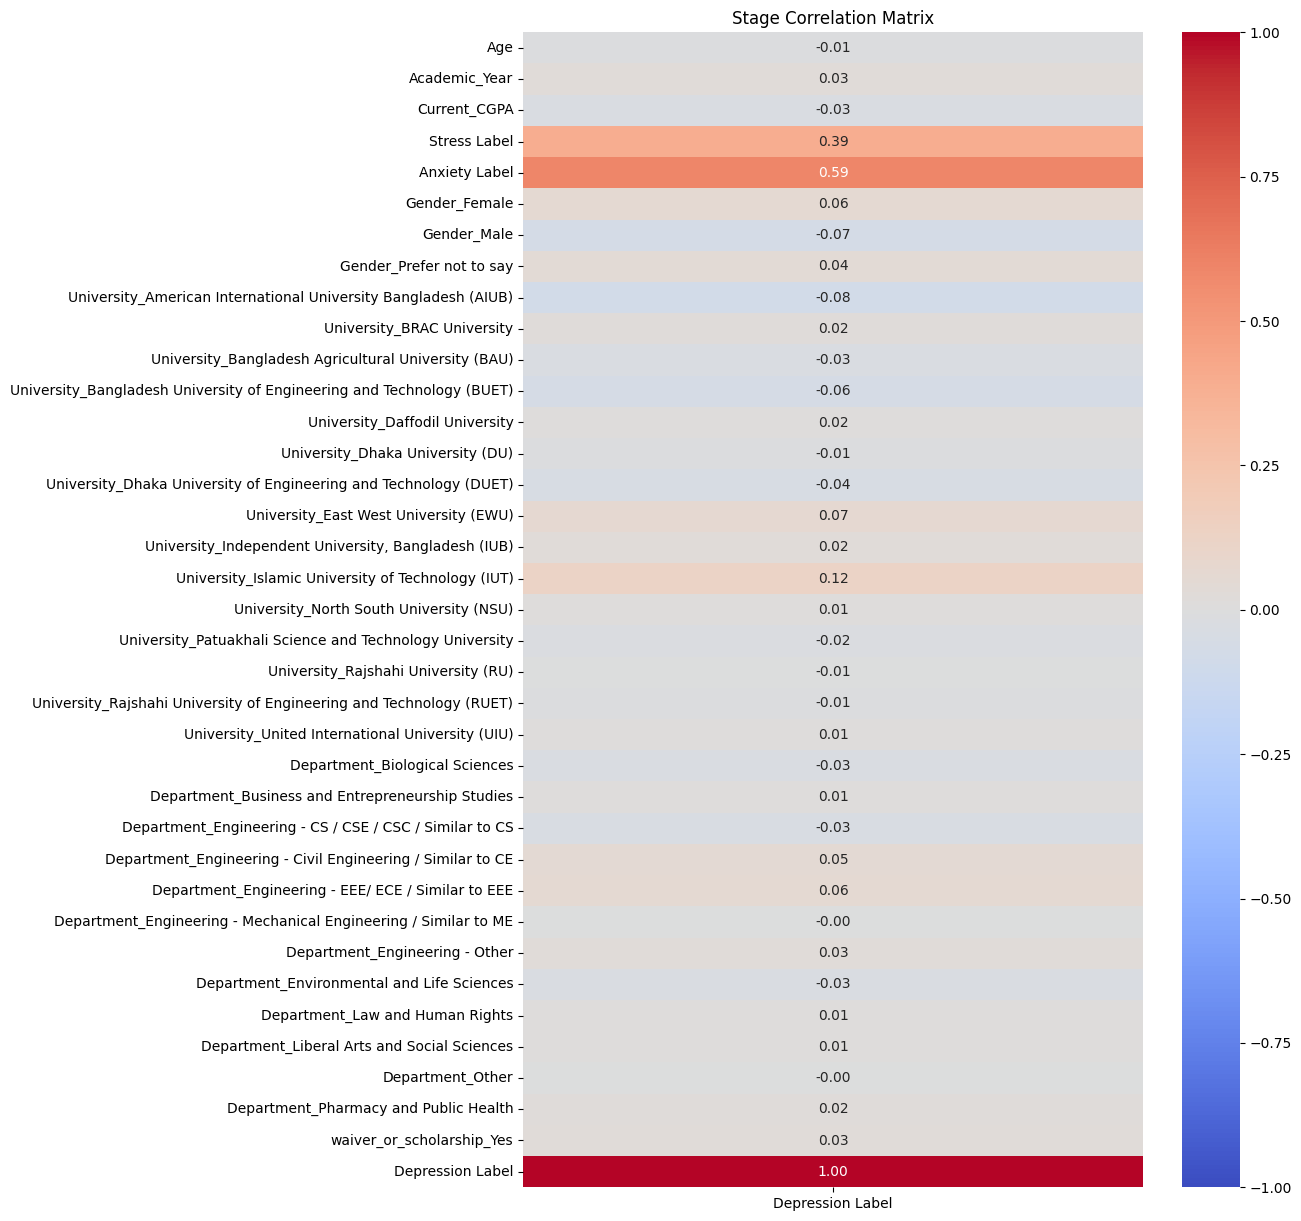

In [ ]:
corr_matrix = data.corr()[["Depression Label"]]
plt.figure(figsize=(10, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Stage Correlation Matrix")
plt.show()

Mostly Correlated - a lot of the PHQ and features indirectly contributing to depression.

MOST Correlated - "How often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down": It's only .01 the other mostly correlated features.

LEAST Correlated - "American International University Bangladesh": Although this is the least correlated, it's mostly neutral.

What we could do:
1. Test our models with every feature
2. Test our models with only correlated features
3. Test our models with neutral features.

In [ ]:
#sns.displot(data["In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?"])

# Show the plot
#plt.show()

Shows distribution of most correlated feature. Most picked option 3.

# Models

## Logistic Regression

### Data Split

In [ ]:
X = data.drop(columns="Depression Label")
y = data["Depression Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Train Acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test Acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, lr_y_train_pred))
print("Test Report:")
print(classification_report(y_test, lr_y_test_pred))

Train Acc: 0.824
Test Acc: 0.798

Train Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       439
           1       0.88      0.88      0.88      1183

    accuracy                           0.82      1622
   macro avg       0.78      0.77      0.78      1622
weighted avg       0.82      0.82      0.82      1622

Test Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       116
           1       0.85      0.88      0.86       290

    accuracy                           0.80       406
   macro avg       0.75      0.74      0.75       406
weighted avg       0.79      0.80      0.80       406



In [ ]:
# Evaluate accuracies.
print(f"Train Acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test Acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}\n")

# Evaluate the model
print("Test Report:")
print(classification_report(y_test, lr_y_test_pred))

Train Acc: 0.824
Test Acc: 0.798

Test Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       116
           1       0.85      0.88      0.86       290

    accuracy                           0.80       406
   macro avg       0.75      0.74      0.75       406
weighted avg       0.79      0.80      0.80       406



### Visualization

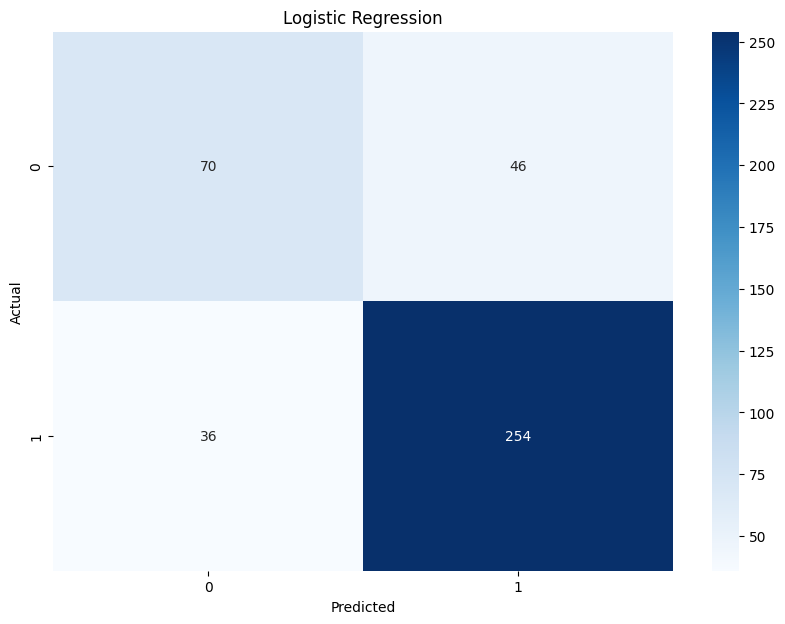

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

## Random Forest

### Data Split

In [ ]:
X = data.drop(columns="Depression Label")
y = data["Depression Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9438964241676943
Test Accuracy: 0.7536945812807881


In [ ]:
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, y_pred_train))
print("Test Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9438964241676943
Test Accuracy: 0.7536945812807881

Train Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       439
           1       0.97      0.95      0.96      1183

    accuracy                           0.94      1622
   macro avg       0.92      0.94      0.93      1622
weighted avg       0.95      0.94      0.94      1622

Test Report:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       116
           1       0.82      0.84      0.83       290

    accuracy                           0.75       406
   macro avg       0.70      0.69      0.69       406
weighted avg       0.75      0.75      0.75       406



### Visualization

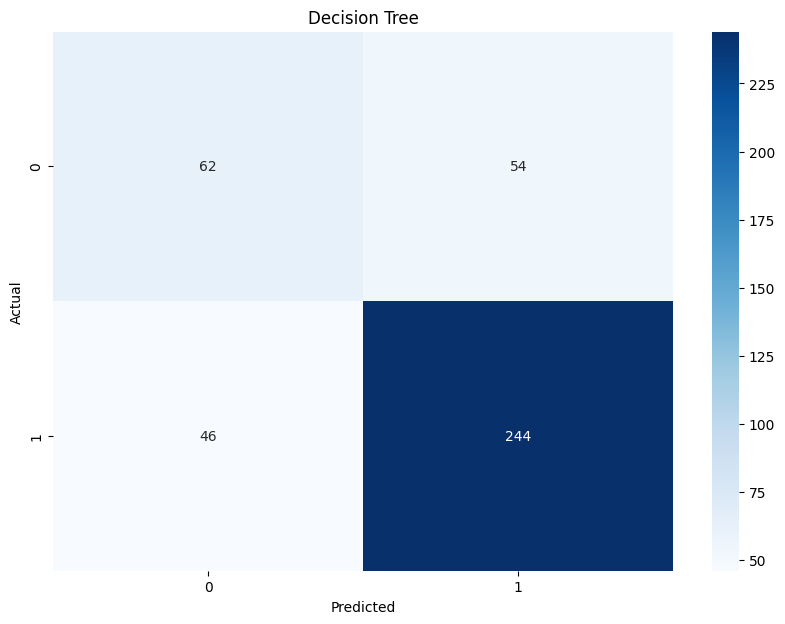

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')
plt.show()

## SVM


### Data Split

In [ ]:
X = data.drop(columns="Depression Label")
y = data["Depression Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
svm_model = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model.fit(X_train, y_train)

svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, svm_y_train_pred)
test_accuracy = accuracy_score(y_test, svm_y_test_pred)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, svm_y_train_pred))
print("Test Report:")
print(classification_report(y_test, svm_y_test_pred))

Training Accuracy: 0.8076448828606658
Test Accuracy: 0.7807881773399015

Train Report:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       439
           1       0.82      0.94      0.88      1183

    accuracy                           0.81      1622
   macro avg       0.78      0.69      0.72      1622
weighted avg       0.80      0.81      0.79      1622

Test Report:
              precision    recall  f1-score   support

           0       0.71      0.39      0.50       116
           1       0.79      0.94      0.86       290

    accuracy                           0.78       406
   macro avg       0.75      0.66      0.68       406
weighted avg       0.77      0.78      0.76       406



### Visualization

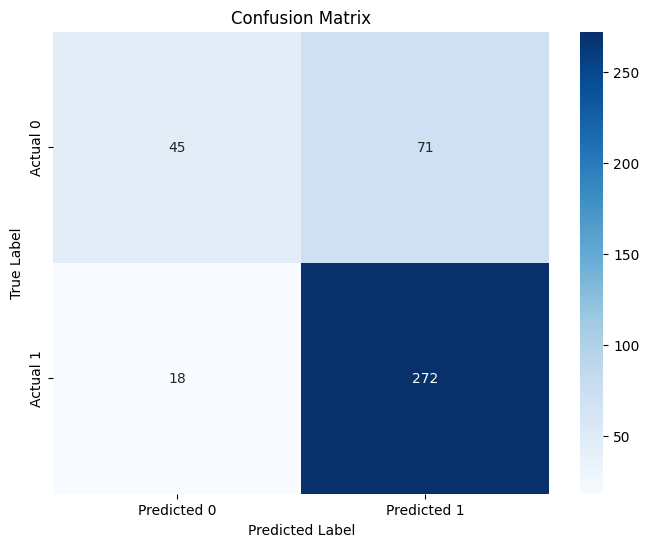

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()